In [2]:
%cd ..

c:\Users\nata0\c3


C:\Users\nata0\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  

from src.util import make_player_df_from_playdf

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
data_dir = 'data/unofficial/2023041506'
p_play = os.path.join(data_dir, 'play.csv')
p_tracking = os.path.join(data_dir, 'tracking.csv')
play_df = pd.read_csv(p_play, encoding='ansi')
tracking_df = pd.read_csv(p_tracking)

# play_df

In [5]:
play_df.head()

,試合ID,履歴No,試合状態ID,チームID,チーム名,選手ID,選手名,選手背番号,ポジションID,アクションID,アクション名,シリーズNo,ホームアウェイF,攻撃番号,流れID,ボールＸ,ボールＹ,攻撃方向,攻撃開始履歴No,攻撃終了履歴No,セル位置コード,距離,ハーフ開始相対時間,F_ゴール,F_アシスト,F_シュート,F_ボレーシュート,F_シュートアシスト,F_トラップ,F_ドリブル,F_パス,F_センタリング,F_スルーパス,F_クリア,F_スラークリア,F_カット,F_スラーカット,F_ブロック,F_スラーブロック,F_キャッチ,F_キーパークリア,F_キーパーブロック,F_ハンドクリア,F_ゴールキック,F_コーナーキック,F_直接フリーキック,F_間接フリーキック,F_ペナルティキック,F_スローイン,F_ファウル,F_被ファウル,F_オフサイド,F_イエローカード,F_レッドカード,F_速攻,F_遅攻,F_中央攻撃,F_右攻め,F_左攻め,F_ボールロスト,F_ボールゲイン,F_リリース,F_レシーブ,F_ファーストタッチ,F_展開,F_こぼれ球奪取,F_バックパス,F_ペナルティエリア進入,F_ペナルティ脇進入,F_30mライン進入,F_バイタルエリア進入,F_プライマリエリア進入,F_シュート関係数,F_ゴール関係数,F_サイドチェンジ１,F_サイドチェンジ２,F_サイドチェンジ３,F_サイドチェンジ中継,F_ボールタッチ,F_一プレイ,F_プレー数１,F_プレー数２,F_プレー数３,F_成功,F_点差,B1_履歴No,B1_チームID,B1_選手ID,B1_アクションID,B1_ホームアウェイF,B1_ボールＸ,B1_ボールＹ,B1_攻撃方向,B1_シュート公式,B2_履歴No,B2_チームID,B2_選手ID,B2_アクションID,B2_ボールＸ,B2_ボールＹ,B2_攻撃方向,A1_履歴No,A1_ハーフ開始相対時間,A1_チームID,A1_選手ID,A1_アクションID,A1_ホームアウェイF,A1_ボールＸ,A1_ボールＹ,A1_攻撃方向,A1_ゴールF,A1_シュート公式,A2_履歴No,A2_チームID,A2_選手ID,A2_アクションID,A2_ボールＸ,A2_ボールＹ,A2_攻撃方向,F_スルー,F_フィード,F_タッチ,F_タックル,F_フリックオン,F_スーパープレー,F_ポスト・バー,F_クロス処理ミス,F_キーパーミス,ラストマンタックルF,クリアドオフザラインF,スマザーF,空中戦F,クロス触れたF,ミスヒットF,キャッチ難F,ファンブルF,スライディングF,成功・失敗F,相手選手ID,フィードID,スーパープレーID,部位ID,相手チームID,映像無しF,F_セーブ,F_PK与えた,相手GK選手ID,位置①,位置②,位置③,位置④,位置⑤,位置⑥,位置⑦,位置⑧,位置⑨,位置⑩,位置⑪,方向角度,方向①,方向②,方向③,方向④,方向⑤,方向⑥,方向特殊,方向特殊A,方向特殊B,方向特殊C,方向特殊D,タッチ種別,展開力,関係P,距離2,Insゴール,Insシュート,セットプレイF,時間,F_シュート公式,パスToWho,F_攻撃１,F_攻撃３,距離3,時間帯,受けプレイ,導くプレイ,キープランF,HOTZONE1-3,開始相対時間,献上プレイ,進入トライ,FKクイックスタート,詳細ポジションID,詳細ポジション名,空アクションF,HOTZONE3-1,HOTZONE2-3,HOTZONE4-6,HOTZONE6-9,HOTZONE3-3,HOTZONE3-3_Detail,HOTZONE3-2,HOTZONE4-6_Detail,HOTZONE5-6_Detail,Insシュート_raw,Insゴール_raw,フレーム番号
0,2023041506,1,1,0,NaN,0,NaN,NaN,0,1,前半開始,1,1,0,0,0.0,0.0,2,0,0,K07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,10001,0,120,1622201,26,1,0.0,0.0,2,0,0,627900,120,1300052,29,46.5,-10.5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,5,NaN,NaN,0,2,0,NaN,NaN,0,0,NaN,0,2,3,14,27,5,8,5,14,18,0,0,1445711
1,2023041506,10001,1,120,鹿島アントラーズ,1622201,荒木 遼太郎,10.0,3,26,キックオフ,2,1,1,9,0.0,0.0,2,10001,857700,K07,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,0.0,0.0,2,0,0,0,0,0,0.0,0.0,0,627900,1,120,1300052,29,1,46.5,-10.5,2,0,0,857700,120,1300052,40,-116.0,104.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,167.27,0,0,0,0,0,4,0,0,0,0,0,3,0,0,15.89,0,0,1,1,0,1300052,0,0,0,5,NaN,NaN,0,2,0,NaN,NaN,0,0,NaN,0,2,3,14,27,5,8,5,14,18,0,0,1445711
2,2023041506,627900,1,120,鹿島アントラーズ,1300052,植田 直通,55.0,2,29,ホームパス,2,1,1,0,46.5,-10.5,2,10001,857700,M07,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,10001,120,1622201,26,1,0.0,0.0,2,0,1,0,0,1,0.0,0.0,2,857700,5,120,1300052,40,1,-116.0,104.0,2,0,0,911799,136,800567,44,-84.5,104.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,324.83,0,0,0,0,0,3,0,0,0,0,0,1,0,0,66.26,0,0,0,4,0,0,0,0,0,5,NaN,NaN,0,2,1,NaN,NaN,0,0,NaN,0,2,4,15,34,5,8,5,15,18,0,0,1445756
3,2023041506,857700,1,120,鹿島アントラーズ,1300052,植田 直通,55.0,2,40,ボールアウト,2,1,1,0,-116.0,104.0,2,10001,857700,C14,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,627900,120,1300052,29,1,46.5,-10.5,2,0,10001,120,1622201,26,0.0,0.0,2,911799,15,136,800567,44,2,-84.5,104.0,1,0,0,1020449,136,1000640,75,-38.5,92.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,10,0,0,0,0,0,5,NaN,NaN,0,1,5,NaN,NaN,0,0,NaN,0,1,1,1,7,1,1,1,1,1,0,0,1445852
4,2023041506,911799,1,136,ヴィッセル神戸,800567,酒井 高徳,24.0,2,44,スローイン,3,2,2,9,-84.5,104.0,1,911799,1788147,E14,0,15,0,0,0,0,0,0,0,1,0

In [6]:
player_df = make_player_df_from_playdf(play_df)

In [7]:
play_df["アクション名"].unique()

array(['前半開始', 'キックオフ', 'ホームパス', 'ボールアウト', 'スローイン', 'フリックオン', 'トラップ',
       'タックル', 'アウェイパス', 'ブロック', 'ドリブル', 'ファウルする', 'ファウル受ける', '直接FK',
       'クリア', 'CK', 'シュート', 'クロス', 'キャッチ', 'フィード', 'スルーパス', 'タッチ', 'GK',
       '試合中断(試合中)', 'ドロップボール', 'ハンドクリア'], dtype=object)

<Axes: title={'center': 'Series No. Count'}, ylabel='シリーズNo'>

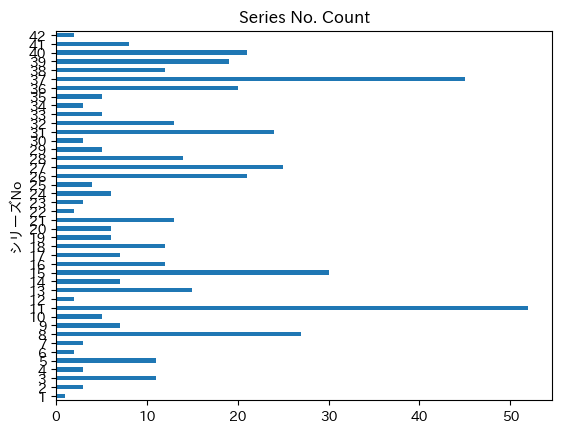

In [8]:
play_df.groupby("シリーズNo").size().plot(kind='barh', title='Series No. Count')

<Axes: title={'center': '選手数'}, ylabel='シリーズNo'>

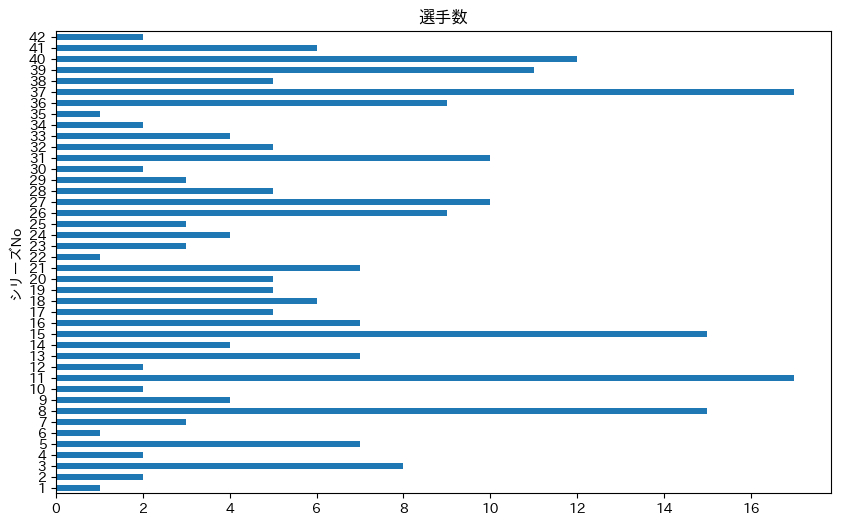

In [9]:
play_df.groupby("シリーズNo")["選手ID"].nunique().plot(kind="barh", figsize=(10, 6), title="選手数")

In [10]:
play_df.nunique()

試合ID                   1
履歴No                 495
試合状態ID                 1
チームID                  3
チーム名                   2
                    ... 
HOTZONE4-6_Detail     24
HOTZONE5-6_Detail     30
Insシュート_raw            1
Insゴール_raw             1
フレーム番号               483
Length: 207, dtype: int64

# tracking_df

In [11]:
tracking_df.head()

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
0,2023041506,1444962,1,10,2,2302,-58,0.0
1,2023041506,1444962,1,19,5,2019,-1458,0.0
2,2023041506,1444962,1,9,10,1148,396,0.0
3,2023041506,1444962,1,5,13,842,-1731,0.0
4,2023041506,1444962,1,25,14,1839,-124,0.0


<Axes: xlabel='X', ylabel='Y'>

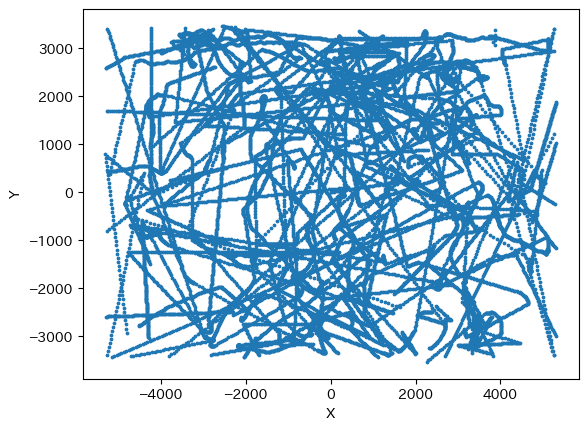

In [12]:
tracking_df.loc[tracking_df['No'] == 0].plot.scatter(x="X", y="Y", s=3)

In [13]:
len(tracking_df.loc[tracking_df['No'] == 0]) / tracking_df["Frame"].nunique(), tracking_df["Frame"].nunique()

(0.43864789225118067, 45736)

In [14]:
tracking_df.loc[tracking_df['No'] == 0].describe()

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
count,2.006200e+04,2.006200e+04,20062.0,20062.0,20062.0,20062.000000,20062.000000,20062.0
mean,2.023042e+09,1.468016e+06,0.0,0.0,0.0,138.518842,224.714734,0.0
std,0.000000e+00,1.352764e+04,0.0,0.0,0.0,2588.791412,2000.156106,0.0
min,2.023042e+09,1.445711e+06,0.0,0.0,0.0,-5304.000000,-3545.000000,0.0
25%,2.023042e+09,1.455078e+06,0.0,0.0,0.0,-1891.000000,-1431.000000,0.0
50%,2.023042e+09,1.469324e+06,0.0,0.0,0.0,247.000000,303.500000,0.0
75%,2.023042e+09,1.480878e+06,0.0,0.0,0.0,2224.000000,2009.750000,0.0
max,2.023042e+09,1.490697e+06,0.0,0.0,0.0,5309.000000,3462.000000,0.0


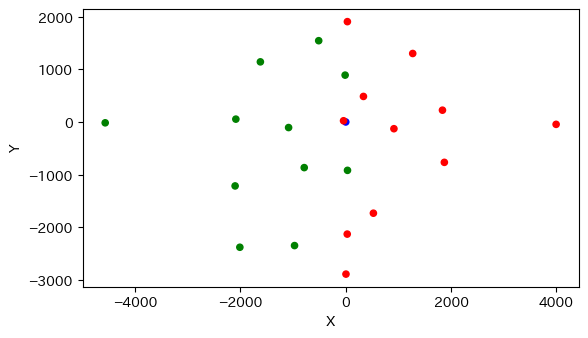

In [16]:
cmap = {
    0: "b",  # Ball
    1: "r",  # Home team
    2: "g"   # Away team
}

# 特定フレームのデータ抽出
ini_frame = int(tracking_df.loc[tracking_df['No'] == 0, "Frame"].iloc[0])
tracking_framedf = tracking_df.loc[tracking_df["Frame"] == ini_frame]

# HA列の値を色にマッピング
colors = tracking_framedf["HA"].map(cmap)

# 散布図描画
tracking_framedf.plot.scatter(x="X", y="Y", color=colors)
plt.gca().set_aspect('equal')  # オプション：縦横比を同じにする
plt.show()


In [18]:
player_df

,ホームアウェイF,選手背番号,ポジションID,選手名,ポジション
0,1,29,1,早川 友基,GK
1,1,55,2,植田 直通,DF
2,1,22,2,広瀬 陸斗,DF
3,1,2,2,安西 幸輝,DF
4,1,5,2,関川 郁万,DF
5,1,10,3,荒木 遼太郎,MF
6,1,21,3,ディエゴ ピトゥカ,MF
7,1,14,3,樋口 雄太,MF
8,1,40,4,鈴木 優磨,FW
9,1,27,4,松村 優太,FW


In [17]:
tracking_framedf

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
16348,2023041506,1445711,0,0,0,0,0,0.0
16349,2023041506,1445711,1,19,2,525,-1733,0.0
16350,2023041506,1445711,1,8,5,1873,-767,0.0
16351,2023041506,1445711,1,20,10,-42,23,0.0
16352,2023041506,1445711,1,5,13,4,-2890,0.0
16353,2023041506,1445711,1,9,14,336,485,0.0
16354,2023041506,1445711,1,25,21,915,-128,0.0
16355,2023041506,1445711,1,1,22,1272,1301,0.0
16356,2023041506,1445711,1,24,27,31,1906,0.0
16357,2023041506,1445711,1,22,29,3996,-45,0.0


In [ ]:
def assosiate_player_detail_role(player_df, init_frame_tracking_df):
    player_df = player_df.copy()
    init_frame_tracking_df = init_frame_tracking_df.copy()

    tempdf = tracking_framedf.merge(
        player_df[["ホームアウェイF", "選手背番号", "ポジション", "ポジションID", "選手名"]],
        left_on=["HA", "No"],
        right_on=["ホームアウェイF", "選手背番号"],
        how="left"
    )
    tempdf = tempdf.loc[tempdf["HA"] != 0]

    new_row = list()
    for ha, ha_df in tempdf.groupby("HA"):
        for pos, pos_df in ha_df.groupby("ポジション"):
            if pos == "DF" and len(pos_df) == 4:
                pos_df.loc[pos_df["Y"].idxmax(), "ポジション"] = "LB"
                pos_df.loc[pos_df["Y"].idxmin(), "ポジション"] = "RB"

            elif pos == "MF" and len(pos_df) >= 3:
                pos_df.loc[pos_df["Y"].idxmax(), "ポジション"] = "LM"
                pos_df.loc[pos_df["Y"].idxmin(), "ポジション"] = "RM"

            new_row.append(pos_df)
    new_df = pd.concat(new_row, ignore_index=True)
    new_player_df = new_df[["ホームアウェイF", "選手背番号", "ポジションID", "選手名", "ポジション"]]
    new_player_df[[ "ホームアウェイF", "選手背番号", "ポジションID"]] = new_player_df[[ "ホームアウェイF", "選手背番号", "ポジションID"]].map(int)
    return new_player_df

In [57]:
assosiate_player_detail_role(player_df, tracking_framedf)

C:\Users\nata0\AppData\Local\Temp\ipykernel_6148\1533462861.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_player_df[[ "ホームアウェイF", "選手背番号", "ポジションID"]] = new_player_df[[ "ホームアウェイF", "選手背番号", "ポジションID"]].map(int)


,ホームアウェイF,選手背番号,ポジションID,選手名,ポジション
0,1,2,2,安西 幸輝,DF
1,1,5,2,関川 郁万,DF
2,1,22,2,広瀬 陸斗,DF
3,1,55,2,植田 直通,DF
4,1,13,4,知念 慶,FW
5,1,27,4,松村 優太,FW
6,1,40,4,鈴木 優磨,FW
7,1,29,1,早川 友基,GK
8,1,10,3,荒木 遼太郎,MF
9,1,14,3,樋口 雄太,LM


In [37]:
player_df

,ホームアウェイF,選手背番号,ポジションID,選手名,ポジション
0,1,29,1,早川 友基,GK
1,1,55,2,植田 直通,DF
2,1,22,2,広瀬 陸斗,DF
3,1,2,2,安西 幸輝,DF
4,1,5,2,関川 郁万,DF
5,1,10,3,荒木 遼太郎,MF
6,1,21,3,ディエゴ ピトゥカ,MF
7,1,14,3,樋口 雄太,MF
8,1,40,4,鈴木 優磨,FW
9,1,27,4,松村 優太,FW


In [ ]:


    # break

,GameID,Frame,HA,SysTarget,No,X,Y,Speed,ホームアウェイF,選手背番号,ポジション
0,2023041506,1445711,1,19,2,525,-1733,0.0,1.0,2.0,DF
1,2023041506,1445711,1,8,5,1873,-767,0.0,1.0,5.0,DF
2,2023041506,1445711,1,1,22,1272,1301,0.0,1.0,22.0,DF
3,2023041506,1445711,1,10,55,1837,224,0.0,1.0,55.0,DF
4,2023041506,1445711,1,5,13,4,-2890,0.0,1.0,13.0,FW
5,2023041506,1445711,1,24,27,31,1906,0.0,1.0,27.0,FW
6,2023041506,1445711,1,21,40,28,-2130,0.0,1.0,40.0,FW
7,2023041506,1445711,1,22,29,3996,-45,0.0,1.0,29.0,GK
8,2023041506,1445711,1,20,10,-42,23,0.0,1.0,10.0,MF
9,2023041506,1445711,1,9,14,336,485,0.0,1.0,14.0,LM


In [ ]:
pos_df.loc[pos_df["Y"].idxmax(), "ポジション"] = "LM"
pos_df.loc[pos_df["Y"].idxmin(), "ポジション"] = "RM"

GameID       2023041506
Frame           1445711
HA                    1
SysTarget            19
No                    2
X                   525
Y                 -1733
Speed               0.0
ホームアウェイF            1.0
選手背番号               2.0
ポジション                DF
Name: 1, dtype: object

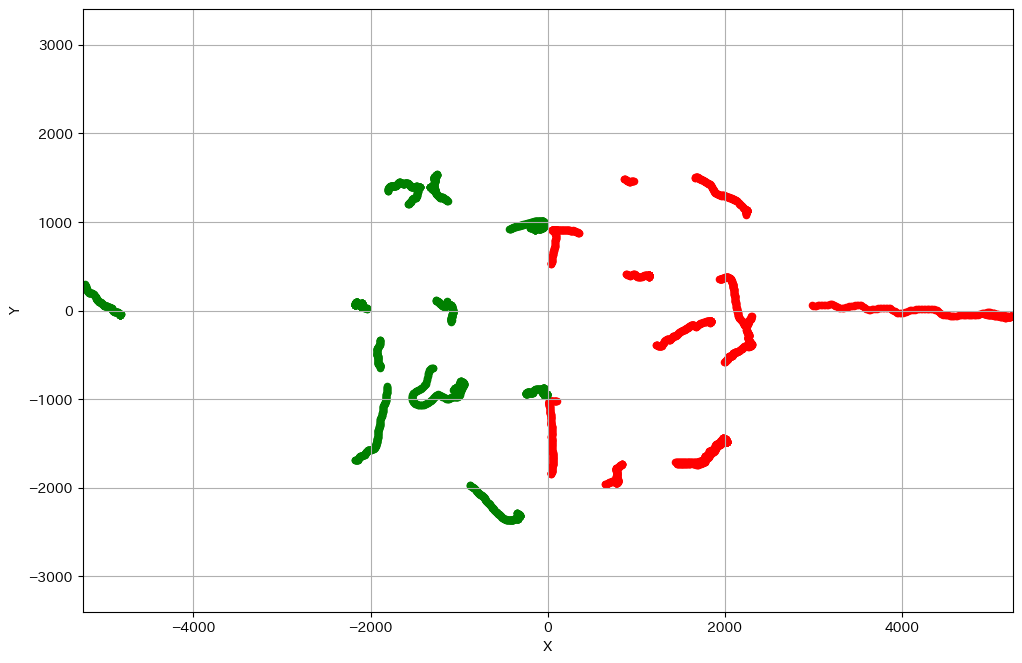

In [ ]:
import matplotlib.pyplot as plt

cmap = {
    0: "b",  # Ball
    1: "r",  # Home team
    2: "g"   # Away team
}
fig, ax = plt.subplots(figsize=(12, 12))

for frame_id, tracking_framedf in tracking_df.iloc[:5000].groupby('Frame'):
    for type_ in tracking_framedf["HA"].unique():
        color = cmap.get(type_, "k")
        df_sub = tracking_framedf[tracking_framedf["HA"] == type_]
        df_sub.plot.scatter(x="X", y="Y", c=color, ax=ax)
    ax.set_xlim(-5250.0, 5250.0)
    ax.set_ylim(-3400.0, 3400.0)
    ax.set_aspect('equal')
    plt.grid(True)

plt.show()

In [ ]:
tracking_framedf = tracking_df.loc[tracking_df["Frame"] == tracking_df["Frame"].unique()[210]]
tracking_framedf

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
4515,2023041506,1445172,1,10,2,2002,374,0.0
4516,2023041506,1445172,1,19,5,1573,-1715,0.0
4517,2023041506,1445172,1,9,10,999,394,0.0
4518,2023041506,1445172,1,5,13,754,-1924,0.0
4519,2023041506,1445172,1,25,14,1294,-388,0.0
4520,2023041506,1445172,1,23,21,1578,-1734,0.0
4521,2023041506,1445172,1,8,22,2041,-529,0.0
4522,2023041506,1445172,1,24,27,962,1465,0.0
4523,2023041506,1445172,1,22,29,5012,-52,0.0
4524,2023041506,1445172,1,21,40,48,-1773,0.0
